# RfSolar Research Notebook

## Objective: Finding Areas with Highest Solar Potential

## Approach

Build a model that 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

# Import Data

## Source 1: Google Project Sunroof

In [13]:
import glob as glob

glob.glob('../data/google-project-sunroof/*')

['../data/google-project-sunroof\\metadata.csv',
 '../data/google-project-sunroof\\project-sunroof-city-09082017.csv',
 '../data/google-project-sunroof\\project-sunroof-county-09082017.csv',
 '../data/google-project-sunroof\\project-sunroof-postal_code-09082017.csv',
 '../data/google-project-sunroof\\project-sunroof-state-09082017.csv',
 '../data/google-project-sunroof\\sunroof_solar_potential_by_censustract.csv']

In [14]:
'''
----------------------
Google Project Sunroof
----------------------

Solar Panel Powered Consumption Offset Estimates

Source:  https://www.kaggle.com/jboysen/google-project-sunroof

'''


# Google Project Sunroof
gps_state = pd.read_csv('../data/google-project-sunroof/project-sunroof-state-09082017.csv')
gps_county = pd.read_csv('../data/google-project-sunroof/project-sunroof-county-09082017.csv')
gps_city = pd.read_csv('../data/google-project-sunroof/project-sunroof-city-09082017.csv')
gps_postal_code = pd.read_csv('../data/google-project-sunroof/project-sunroof-postal_code-09082017.csv')

gps_solar_potential = pd.read_csv('../data/google-project-sunroof/sunroof_solar_potential_by_censustract.csv')

In [15]:
gps_county = pd.read_csv('../data/google-project-sunroof/project-sunroof-county-09082017.csv')
gps_solar_potential = pd.read_csv('../data/google-project-sunroof/sunroof_solar_potential_by_censustract.csv')

In [16]:
gps_location_cols = ['state_name','region_name','lat_avg', 'lat_max', \
                     'lat_min', 'lng_avg', 'lng_max', 'lng_min']

gps_current_cols = ['existing_installs_count']

gps_potential_cols = ['kw_median','kw_total']

In [17]:
gps_solar_potential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48722 entries, 0 to 48721
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   carbon_offset_metric_tons             48722 non-null  float64
 1   count_qualified                       48722 non-null  int64  
 2   existing_installs_count               48722 non-null  int64  
 3   install_size_kw_buckets               48664 non-null  object 
 4   kw_median                             48664 non-null  float64
 5   kw_total                              48664 non-null  float64
 6   lat_avg                               48722 non-null  float64
 7   lat_max                               48722 non-null  float64
 8   lat_min                               48722 non-null  float64
 9   lng_avg                               48722 non-null  float64
 10  lng_max                               48722 non-null  float64
 11  lng_min        

## Source 2: Stanford DeepSolar

In [4]:
'''
------------------------
Stanford Deep Solar Data
------------------------
In short this data was collected by using billions of satellite images and running a Solar Panel image recognition
Deep Learning model to identify and label almost all of the solar panels in the US.


'''

# Stanford DeepSolar Data
data = pd.read_csv('../data/deep_solar/deepsolar_tract.csv', encoding="ISO-8859-1").drop(columns=['Unnamed: 0'])

In [5]:
data.head()

,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0.0,0.0,0.000000,27145011200,70352.789869,Stearns County,569,1690,13,1757,...,39,11,13,34,0,0,25,12,0,9.46
1,25.0,21.0,1133.436461,27145011301,61727.085202,Stearns County,674,1434,108,767,...,39,11,13,34,0,0,25,12,0,9.46
2,3.0,3.0,64.505776,27145011302,71496.886583,Stearns County,854,1459,31,1541,...,39,11,13,34,0,0,25,12,0,9.46
3,0.0,0.0,0.000000,27145011304,86840.152755,Stearns County,640,1116,68,1095,...,39,11,13,34,0,0,25,12,0,9.46
4,5.0,5.0,164.583303,27145011400,89135.315597,Stearns County,654,1314,15,982,...,39,11,13,34,0,0,25,12,0,9.46


In [6]:
data.columns

Index(['tile_count', 'solar_system_count', 'total_panel_area', 'fips',
       'average_household_income', 'county', 'education_bachelor',
       'education_college', 'education_doctoral',
       'education_high_school_graduate',
       ...
       'incentive_count_nonresidential', 'incentive_residential_state_level',
       'incentive_nonresidential_state_level', 'net_metering', 'feedin_tariff',
       'cooperate_tax', 'property_tax', 'sales_tax', 'rebate',
       'avg_electricity_retail_rate'],
      dtype='object', length=168)

# Approach

Using this data we are able to pull two important insights.  

#### Where? What areas have the most potential?
- From the Google Sunroof Dataset, we should be able to find the counties that have the highest potential for solar. 

#### Who? What does the ideal consumer look like?
- From the Stanford DeepSolar Dataset, we should be able to find the ideal customer demographic by household type.



# 1. Where?

### Machine learning model to predict amount of solar installations.
### If reality is lower than prediction, then there is a potential opportunity for solar.



In [41]:
gps_county.head(10)

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,NaN,NaN,32.551561,32.551527,-116.919812,-116.920318,32.551544,-116.920065,1299.65,2,...,4.745559e+03,7.692078e+03,0.000000e+00,0.000000e+00,0.000000e+00,5209.464685,1.243764e+04,"[[0,2]]",0.000000e+00,0
1,Acadia Parish,Louisiana,30.480512,30.150698,-92.144065,-92.598066,30.256188,-92.331117,1073.55,28,...,3.663058e+04,1.084676e+05,7.170529e+04,9.811702e+04,3.557943e+06,18455.689746,3.872863e+06,"[[0,5],[5,2],[10,5],[15,3],[20,2],[25,1],[40,1...",2.619893e+03,0
2,Ada County,Idaho,43.776411,43.297448,-115.998789,-116.512796,43.614095,-116.308027,1161.95,127097,...,4.510353e+07,7.928349e+08,3.305852e+08,5.466880e+08,9.644616e+08,12656.146387,2.679673e+09,"[[0,21743],[5,46490],[10,31665],[15,13302],[20...",7.125475e+05,333
3,Adams County,Colorado,40.000318,39.738577,-104.310944,-105.052979,39.879721,-104.923252,1250.35,103951,...,1.402637e+07,5.047118e+08,2.529707e+08,2.968862e+08,1.160027e+09,8740.831396,2.228622e+09,"[[0,37831],[5,40975],[10,12770],[15,4216],[20,...",1.356972e+06,2218
4,Aiken County,South Carolina,33.853912,33.271435,-81.276617,-82.007226,33.517511,-81.801685,1099.05,45852,...,6.609113e+07,2.521735e+08,1.524194e+08,1.672472e+08,2.772775e+08,12029.735608,9.152087e+08,"[[0,8380],[5,15615],[10,11092],[15,5170],[20,2...",5.372701e+05,84
5,Alachua County,Florida,29.920934,29.417511,-82.050280,-82.655919,29.667960,-82.388744,1110.10,42187,...,9.294607e+07,2.768720e+08,1.658361e+08,1.942860e+08,5.696316e+08,14539.132959,1.299572e+09,"[[0,6904],[5,10651],[10,8698],[15,5524],[20,28...",6.946478e+05,913
6,Alamance County,North Carolina,36.226214,35.863546,-79.259541,-79.538533,36.082801,-79.420890,1088.85,14701,...,1.326768e+07,7.223971e+07,4.699191e+07,5.479806e+07,2.821378e+08,10088.853784,4.694352e+08,"[[0,3813],[5,5077],[10,2344],[15,1025],[20,466...",2.755803e+05,16
7,Alameda County,California,37.905008,37.456808,-121.491564,-122.339559,37.705862,-122.092568,1229.95,329945,...,5.699543e+08,1.461432e+09,1.060492e+09,1.330024e+09,4.301220e+09,13016.270593,8.723122e+09,"[[0,68253],[5,111930],[10,74589],[15,35251],[2...",2.377535e+06,12126
8,Albany County,New York,42.820149,42.435932,-73.680408,-74.206915,42.684110,-73.817326,965.60,67635,...,2.642352e+07,2.538750e+08,1.671630e+08,1.378322e+08,8.442318e+08,7369.363660,1.429526e+09,"[[0,21176],[5,27086],[10,9583],[15,3020],[20,1...",5.223754e+05,579
9,Albemarle County,Virginia,38.250786,37.759752,-78.247592,-78.821408,38.065287,-78.501643,1051.45,9687,...,7.337487e+06,4.706965e+07,3.590934e+07,2.950324e+07,1.159026e+08,7510.342987,2.357224e+08,"[[0,3761],[5,2997],[10,1049],[15,438],[20,269]...",1.512686e+05,13


In [42]:
gps_county.columns.values

array(['region_name', 'state_name', 'lat_max', 'lat_min', 'lng_max',
       'lng_min', 'lat_avg', 'lng_avg',
       'yearly_sunlight_kwh_kw_threshold_avg', 'count_qualified',
       'percent_covered', 'percent_qualified', 'number_of_panels_n',
       'number_of_panels_s', 'number_of_panels_e', 'number_of_panels_w',
       'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
       'carbon_offset_metric_tons', 'existing_installs_count'],
      dtype=object)

In [24]:
gps_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   region_name                           909 non-null    object 
 1   state_name                            909 non-null    object 
 2   lat_max                               910 non-null    float64
 3   lat_min                               910 non-null    float64
 4   lng_max                               910 non-null    float64
 5   lng_min                               910 non-null    float64
 6   lat_avg                               910 non-null    float64
 7   lng_avg                               910 non-null    float64
 8   yearly_sunlight_kwh_kw_threshold_avg  910 non-null    float64
 9   count_qualified                       910 non-null    int64  
 10  percent_covered                       910 non-null    float64
 11  percent_qualified  

In [22]:
ID = ['region_name', 'state_name']

details_ = ['yearly_sunlight_kwh_kw_threshold_avg', 'count_qualified',\
            'percent_covered', 'percent_qualified', 'number_of_panels_n',\
            'number_of_panels_s', 'number_of_panels_e', 'number_of_panels_w',\
            'number_of_panels_f', 'number_of_panels_median',\
            'number_of_panels_total', 'kw_median', 'kw_total',\
            'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',\
            'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',\
            'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',\
            'yearly_sunlight_kwh_total']

location_ = ['lat_max', 'lat_min', 'lng_max', 'lng_min', 'lat_avg', 'lng_avg'] 

carbon_offset_ = ['carbon_offset_metric_tons']

target_ = ['existing_installs_count']

## Low Existing, High Carbon Offset

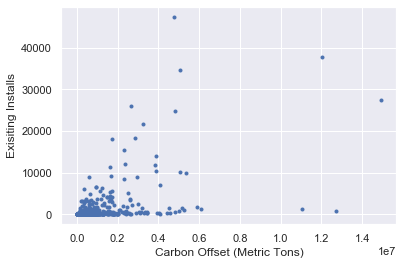

In [23]:
_ = plt.plot(gps_county['carbon_offset_metric_tons'], gps_county['existing_installs_count'], linestyle='None', marker='.')
_ = plt.xlabel('Carbon Offset (Metric Tons)')
_ = plt.ylabel('Exisiting Installs')

# Map

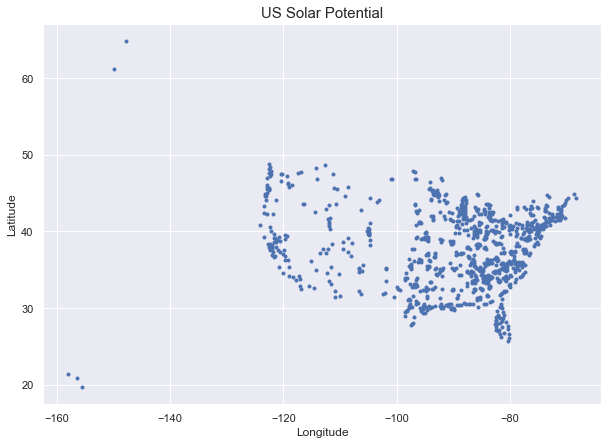

In [32]:
_ = plt.figure(figsize=[10, 7])
_ = plt.plot(gps_county['lng_avg'], gps_county['lat_avg'], linestyle='None', marker='.')
_ = plt.title('US Solar Potential', size=15)
_ = plt.xlabel('Longitude')
_ = plt.ylabel('Latitude')

In [ ]:
,

# 2. Who?

### Building a Comprehensive Report by County

Identification Columns: 

    State, County

County Data:
    
    Household Size, Household Count, Housing Unit Size, Housing Unit Count, Household Income, 
    Per Capita Income, Age, Education, Education Rate, Employment, Employment Rate,
    Heating Fuel, Heating Fuel Rate, Land Area, Population, Population Density, Poverty, Race,
    Electricity Prices, Electricty Consumption, Occupation, Transportation, Travel Time, 
    Health Insurance, Morgage Rate, Voting, Incentive, Tax

Weather:

    Temperature, Frost, Humidity, Radiation, Presssure, Wind

Solar Data (Residential, Non-Residential):

    Solar Systems, Tile Counts, Total Panel Area, 
    



In [7]:
data_by_county = data.groupby(['state','county']).mean()

In [8]:
electric_cols = data.columns[data.columns.str.contains('electricity')]
solar_cols = data.columns[data.columns.str.contains('solar')]
tile_cols = data.columns[data.columns.str.contains('tile')]
households_cols = data.columns[data.columns.str.contains('hous')]
population_cols = data.columns[data.columns.str.contains('population')]

location_cols = ['lat','lon','elevation','county','state']
area_cols = data.columns[data.columns.str.contains('area')]

heating_cols = data.columns[data.columns.str.contains('heating')]
education_cols = data.columns[data.columns.str.contains('education')]
race_cols = data.columns[data.columns.str.contains('race')]
age_cols = data.columns[data.columns.str.contains('age')]
occupation_cols = data.columns[data.columns.str.contains('occupation')]
transport_cols = data.columns[data.columns.str.contains('transport')]
tax_cols = data.columns[data.columns.str.contains('tax')]
voting_cols = data.columns[data.columns.str.contains('voting')]
incentitve_cols = data.columns[data.columns.str.contains('incentive')]

## 1. Residential Analysis

In [9]:
residential_cols = data.columns[data.columns.str.contains('_resi')]
nonresidential_cols = data.columns[data.columns.str.contains('nonresi')]


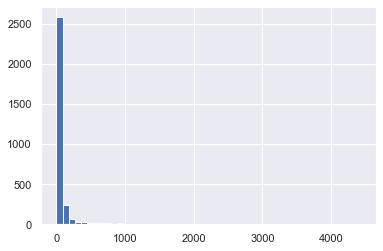

In [10]:
_ = data_by_county['total_panel_area_residential'].hist(bins=50)

## a. Households (Residential)

Explore how the households in certain areas affect total amount of residential solar.

In [11]:
households_cols = data.columns[data.columns.str.contains('hous')]

In [12]:
data[households_cols].head()

,average_household_income,heating_fuel_housing_unit_count,median_household_income,household_count,average_household_size,housing_unit_count,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,household_type_family_rate,number_of_solar_system_per_household
0,70352.789869,2527,64232.0,2527,2.58,2931,2527,192500.0,814.0,0.756233,0.000000
1,61727.085202,2230,49778.0,2230,2.75,2356,2230,157000.0,733.0,0.609417,0.006726
2,71496.886583,2698,63355.0,2698,2.55,2909,2698,182400.0,692.0,0.726835,0.001112
3,86840.152755,1833,71599.0,1833,2.57,2226,1833,251400.0,681.0,0.817785,0.000000
4,89135.315597,1917,68401.0,1917,2.74,2004,1917,208600.0,882.0,0.768388,0.002087


### Average Household Income vs Total Panel Area Residential

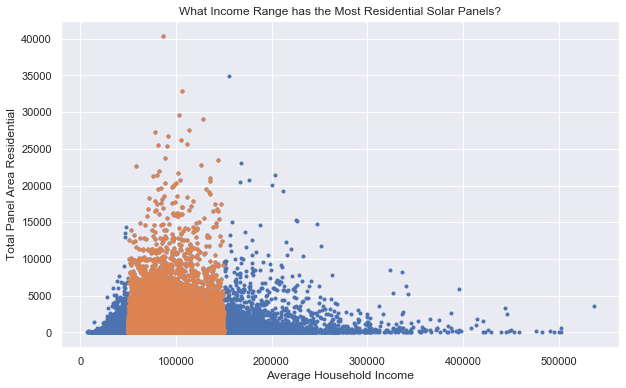

In [13]:
target_range = data[(data['average_household_income'] > 50000) & (data['average_household_income'] < 150000)]

_ = plt.figure(figsize=(10,6))
_ = plt.plot(data['average_household_income'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(target_range['average_household_income'], target_range['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.title('What Income Range has the Most Residential Solar Panels?')
_ = plt.xlabel('Average Household Income')
_ = plt.ylabel('Total Panel Area Residential')

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans()



In [15]:
data_by_county[households_cols].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3108 entries, ('al', 'Autauga County') to ('wy', 'Weston County')
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   average_household_income              3108 non-null   float64
 1   heating_fuel_housing_unit_count       3108 non-null   float64
 2   median_household_income               3107 non-null   float64
 3   household_count                       3108 non-null   float64
 4   average_household_size                3108 non-null   float64
 5   housing_unit_count                    3108 non-null   float64
 6   housing_unit_occupied_count           3108 non-null   float64
 7   housing_unit_median_value             3107 non-null   float64
 8   housing_unit_median_gross_rent        3107 non-null   float64
 9   household_type_family_rate            3108 non-null   float64
 10  number_of_solar_system_per_household  3108

## b. Population (Residential)

In [16]:
population_cols = data.columns[data.columns.str.contains('population')]

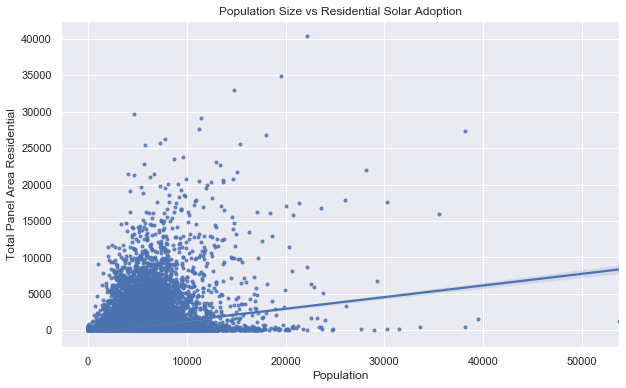

In [18]:
_ = plt.figure(figsize=(10,6))
#_ = plt.plot(data['population'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = sns.regplot(x='population', y='total_panel_area_residential', data=data, marker='.')
#_ = plt.plot(target_range['average_household_income'], target_range['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.title('Population Size vs Residential Solar Adoption')
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Panel Area Residential')

### High Population Density Areas have less Solar

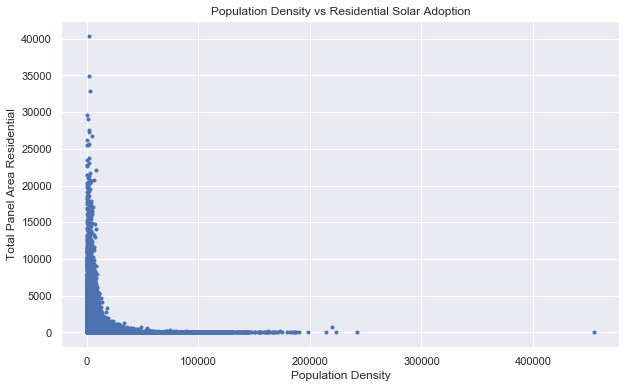

In [19]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(data['population_density'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.title('Population Density vs Residential Solar Adoption')
_ = plt.xlabel('Population Density')
_ = plt.ylabel('Total Panel Area Residential')

## c. Education (Residential)

In [20]:
education_cols = data.columns[data.columns.str.contains('education')]
education_cols

Index(['education_bachelor', 'education_college', 'education_doctoral',
       'education_high_school_graduate', 'education_less_than_high_school',
       'education_master', 'education_population',
       'education_professional_school', 'education_less_than_high_school_rate',
       'education_high_school_graduate_rate', 'education_college_rate',
       'education_bachelor_rate', 'education_master_rate',
       'education_professional_school_rate', 'education_doctoral_rate',
       'occupation_education_rate', 'number_of_years_of_education'],
      dtype='object')

Years of Education: 13.473986763185986


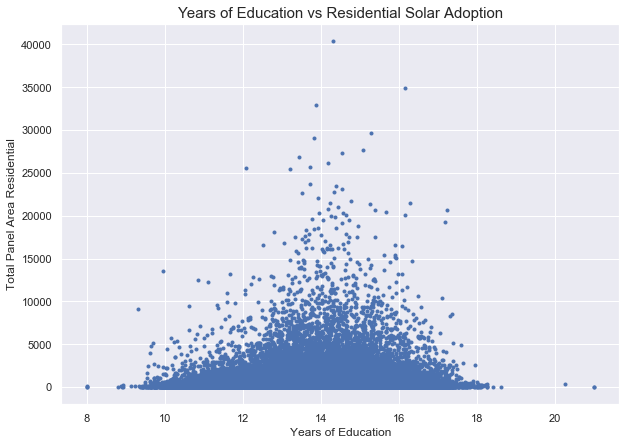

In [75]:
# Average Household Size
print('Years of Education: ' + str(data['number_of_years_of_education'].mean()))

# Plot
_ = plt.figure(figsize=(10,7))
_ = plt.plot(data['number_of_years_of_education'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.title('Years of Education vs Residential Solar Adoption', size=15)
_ = plt.xlabel('Years of Education')
_ = plt.ylabel('Total Panel Area Residential')

Average Education Population: 2895.5570812137253


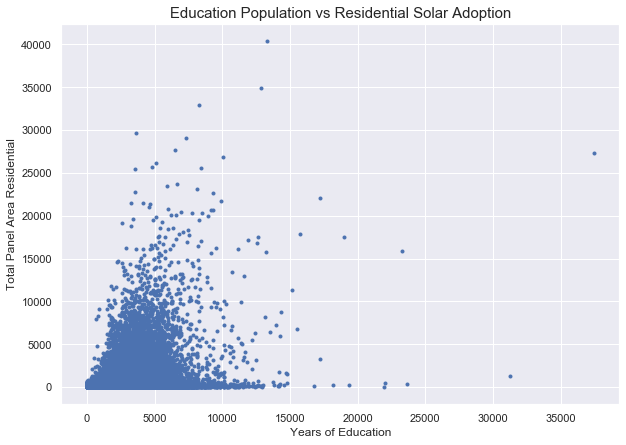

In [77]:
# Average Education Population
print('Average Education Population: ' + str(data['education_population'].mean()))

# Plot
_ = plt.figure(figsize=(10,7))
_ = plt.plot(data['education_population'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.title('Education Population vs Residential Solar Adoption', size=15)
_ = plt.xlabel('Years of Education')
_ = plt.ylabel('Total Panel Area Residential')

In [20]:
education_cols = data.columns[data.columns.str.contains('education')]
education_cols

Index(['education_bachelor', 'education_college', 'education_doctoral',
       'education_high_school_graduate', 'education_less_than_high_school',
       'education_master', 'education_population',
       'education_professional_school', 'education_less_than_high_school_rate',
       'education_high_school_graduate_rate', 'education_college_rate',
       'education_bachelor_rate', 'education_master_rate',
       'education_professional_school_rate', 'education_doctoral_rate',
       'occupation_education_rate', 'number_of_years_of_education'],
      dtype='object')

Average College: 842.0396211588569
Average Bachelor: 536.095689096599
Average Doctoral: 38.13817775755821
Average High School Graduate: 804.0671932944566
Average Less than High School: 387.4684643699078
Average Masters: 230.79679336062975
Average Professional School: 56.95114217571722


Average Less than High School: 387.4684643699078
Average High School Graduate: 804.0671932944566
Average College: 842.0396211588569
Average Bachelor: 536.095689096599
Average Masters: 230.79679336062975
Average Doctoral: 38.13817775755821
Average Professional School: 56.95114217571722


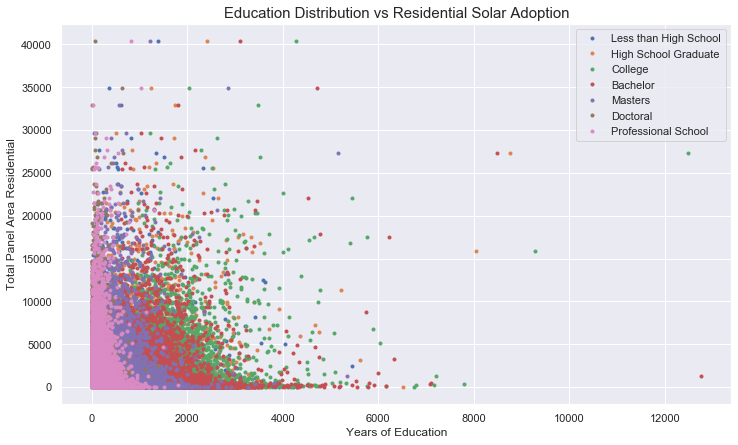

In [86]:
# Average Education Population
print('Average Less than High School: ' + str(data['education_less_than_high_school'].mean()))
print('Average High School Graduate: ' + str(data['education_high_school_graduate'].mean()))
print('Average College: ' + str(data['education_college'].mean()))
print('Average Bachelor: ' + str(data['education_bachelor'].mean()))
print('Average Masters: ' + str(data['education_master'].mean()))
print('Average Doctoral: ' + str(data['education_doctoral'].mean()))
print('Average Professional School: ' + str(data['education_professional_school'].mean()))

# Plot
_ = plt.figure(figsize=(12,7))
_ = plt.plot(data['education_less_than_high_school'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['education_high_school_graduate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['education_college'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['education_bachelor'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['education_master'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['education_doctoral'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['education_professional_school'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.title('Education Distribution vs Residential Solar Adoption', size=15)
_ = plt.xlabel('Years of Education')
_ = plt.ylabel('Total Panel Area Residential')
_ = plt.legend(['Less than High School','High School Graduate','College','Bachelor','Masters','Doctoral','Professional School'], loc="best")

Average Less than High School: 387.4684643699078
Average High School Graduate: 804.0671932944566
Average College: 842.0396211588569
Average Bachelor: 536.095689096599
Average Masters: 230.79679336062975
Average Doctoral: 38.13817775755821
Average Professional School: 56.95114217571722


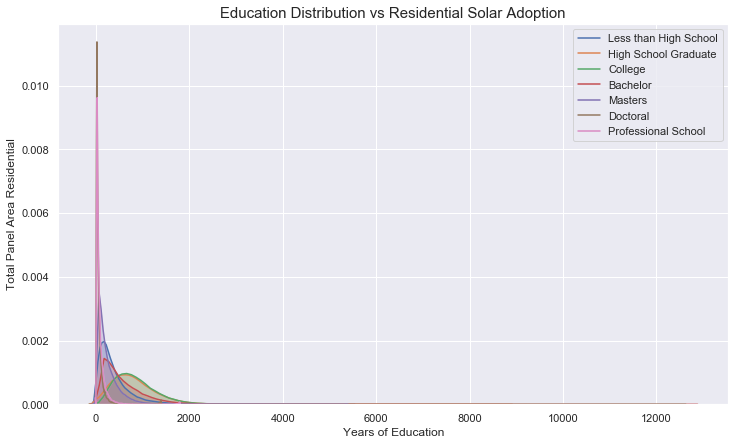

In [90]:
# Average Education Population
print('Average Less than High School: ' + str(data['education_less_than_high_school'].mean()))
print('Average High School Graduate: ' + str(data['education_high_school_graduate'].mean()))
print('Average College: ' + str(data['education_college'].mean()))
print('Average Bachelor: ' + str(data['education_bachelor'].mean()))
print('Average Masters: ' + str(data['education_master'].mean()))
print('Average Doctoral: ' + str(data['education_doctoral'].mean()))
print('Average Professional School: ' + str(data['education_professional_school'].mean()))

# Plot
_ = plt.figure(figsize=(12,7))
_ = sns.kdeplot(data['education_less_than_high_school'], shade='fill')
_ = sns.kdeplot(data['education_high_school_graduate'], shade='fill')
_ = sns.kdeplot(data['education_college'], shade='fill')
_ = sns.kdeplot(data['education_bachelor'], shade='fill')
_ = sns.kdeplot(data['education_master'], shade='fill')
_ = sns.kdeplot(data['education_doctoral'], shade='fill')
_ = sns.kdeplot(data['education_professional_school'], shade='fill')
_ = plt.title('Education Distribution vs Residential Solar Adoption', size=15)
_ = plt.xlabel('Years of Education')
_ = plt.ylabel('Total Panel Area Residential')
_ = plt.legend(['Less than High School','High School Graduate','College','Bachelor','Masters','Doctoral','Professional School'], loc="best")

In [71]:
education_cols

Index(['education_bachelor', 'education_college', 'education_doctoral',
       'education_high_school_graduate', 'education_less_than_high_school',
       'education_master', 'education_population',
       'education_professional_school', 'education_less_than_high_school_rate',
       'education_high_school_graduate_rate', 'education_college_rate',
       'education_bachelor_rate', 'education_master_rate',
       'education_professional_school_rate', 'education_doctoral_rate',
       'occupation_education_rate', 'number_of_years_of_education'],
      dtype='object')

Average Household Size: 2.6546385701738475


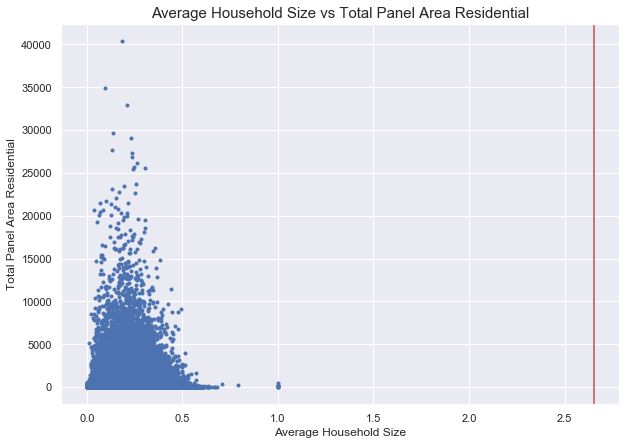

In [88]:
# Average Household Size
print('Average Household Size: ' + str(data['average_household_size'].mean()))

_ = plt.figure(figsize=(10,7))
_ = plt.plot(data['education_high_school_graduate_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.axvline(data['average_household_size'].mean(), color='r')
_ = plt.title('Average Household Size vs Total Panel Area Residential', size=15)
_ = plt.xlabel('Average Household Size')
_ = plt.ylabel('Total Panel Area Residential')

## d. Age (Residential)

In [87]:
age_cols = data.columns[data.columns.str.contains('age_')]
age_cols.values

array(['average_household_income', 'average_household_size',
       'age_18_24_rate', 'age_25_34_rate', 'age_more_than_85_rate',
       'age_75_84_rate', 'age_35_44_rate', 'age_45_54_rate',
       'age_65_74_rate', 'age_55_64_rate', 'age_10_14_rate',
       'age_15_17_rate', 'age_5_9_rate', 'mortgage_with_rate',
       'age_median'], dtype=object)

Average Household Size: 2.6546385701738475


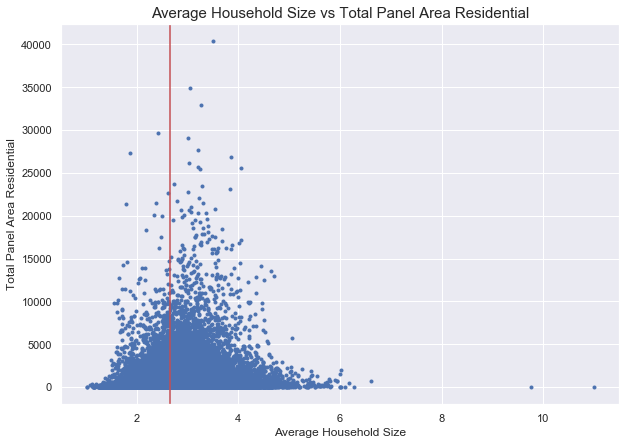

In [34]:
# Average Household Size
print('Average Household Size: ' + str(data['average_household_size'].mean()))

_ = plt.figure(figsize=(10,7))
_ = plt.plot(data['average_household_size'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.axvline(data['average_household_size'].mean(), color='r')
_ = plt.title('Average Household Size vs Total Panel Area Residential', size=15)
_ = plt.xlabel('Average Household Size')
_ = plt.ylabel('Total Panel Area Residential')

## b) Median Age

Median Age: 38.92695704173391


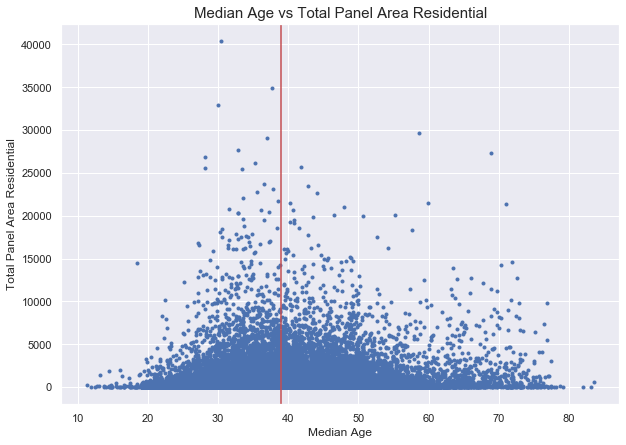

In [43]:
# Median Age
print('Median Age: ' + str(data['age_median'].mean()))

# Plot
_ = plt.figure(figsize=(10,7))
_ = plt.plot(data['age_median'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.axvline(data['age_median'].mean(), color='r')
_ = plt.title('Median Age vs Total Panel Area Residential', size=15)
_ = plt.xlabel('Median Age')
_ = plt.ylabel('Total Panel Area Residential')

## By Age Groups

By Age Groups: 38.92695704173391


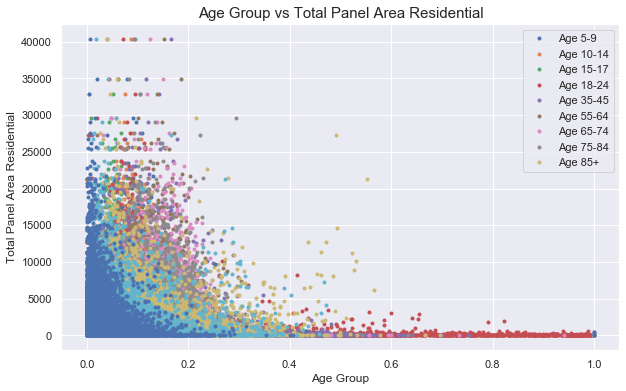

In [41]:
# By Age Groups
print('By Age Groups: ' + str(data['age_median'].mean()))
age_categories = ['Age 5-9','Age 10-14','Age 15-17','Age 18-24','Age 35-45','Age 55-64','Age 65-74','Age 75-84','Age 85+']


# Plot
_ = plt.figure(figsize=(10,6))
_ = plt.plot(data['age_5_9_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['age_10_14_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['age_15_17_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['age_18_24_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['age_25_34_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['age_35_44_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['age_45_54_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['age_55_64_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['age_65_74_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['age_75_84_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['age_more_than_85_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.title('Age Group vs Total Panel Area Residential', size=15)
_ = plt.xlabel('Age Group')
_ = plt.ylabel('Total Panel Area Residential')
_ = plt.legend(age_categories, loc="best")

# Average Travel Time

Travel Time Average: 25.645864137257636


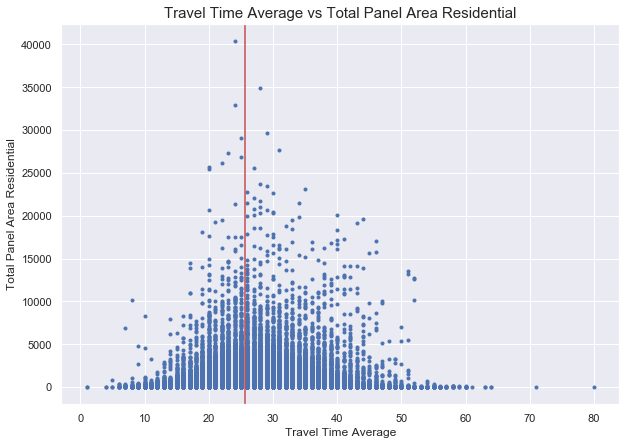

In [46]:
# Average Travel Time
print('Average Travel Time: ' + str(data['travel_time_average'].mean()))

# Plot
_ = plt.figure(figsize=(10,7))
_ = plt.plot(data['travel_time_average'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.axvline(data['travel_time_average'].mean(), color='r')
_ = plt.title('Average Travel Time vs Total Panel Area Residential', size=15)
_ = plt.xlabel('Average Travel Time')
_ = plt.ylabel('Total Panel Area Residential')

## Political 2012

Average Democrat Pct (2012): 0.5178562670409931
Average Republican Pct (2012): 0.46574854395561427


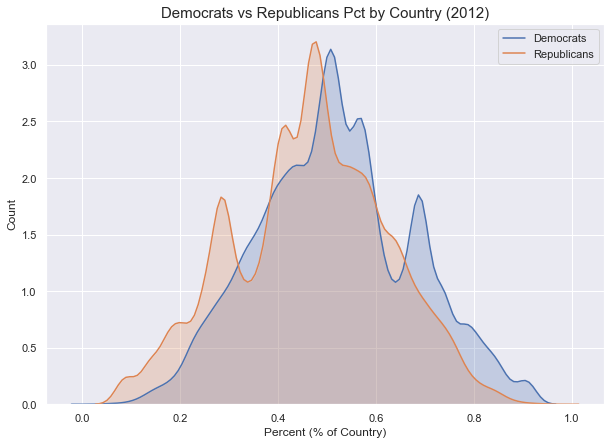

In [68]:
# Voting Pct
print('Average Democrat Pct (2012): ' + str(data['voting_2012_dem_percentage'].mean()))
print('Average Republican Pct (2012): ' + str(data['voting_2012_gop_percentage'].mean()))

# Plot
_ = plt.figure(figsize=(10,7))
_ = sns.kdeplot(data['voting_2012_dem_percentage'], shade='fill')
_ = sns.kdeplot(data['voting_2012_gop_percentage'], shade='fill')
_ = plt.title('Democrats vs Republicans Pct by Country (2012)', size=15)
_ = plt.xlabel('Percent (% of Country)')
_ = plt.ylabel('Count')
_ = plt.legend(['Democrats','Republicans'])

## Political 2016

Average Republican Pct (2016): 0.46257237059429307
Average Democrat Pct (2016): 0.48867367696444525


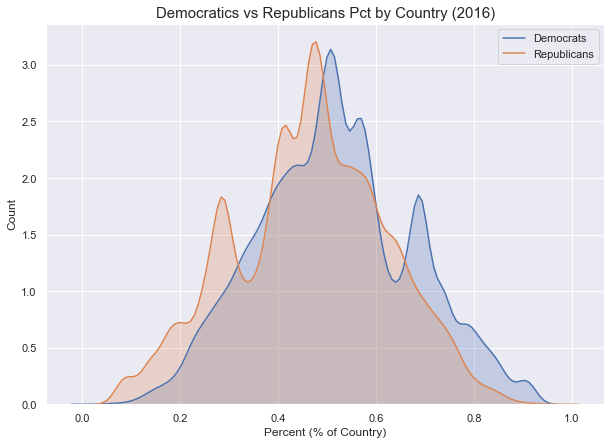

In [70]:
# By Age Groups
print('Average Republican Pct (2016): ' + str(data['voting_2016_gop_percentage'].mean()))
print('Average Democrat Pct (2016): ' + str(data['voting_2016_dem_percentage'].mean()))

# Plot
_ = plt.figure(figsize=(10,7))
_ = sns.kdeplot(data['voting_2012_dem_percentage'], shade='fill')
_ = sns.kdeplot(data['voting_2012_gop_percentage'], shade='fill')
_ = plt.title('Democratics vs Republicans Pct by Country (2016)', size=15)
_ = plt.xlabel('Percent (% of Country)')
_ = plt.ylabel('Count')
_ = plt.legend(['Democrats','Republicans'])

## e. Race (Residential)

In [89]:
race_cols = data.columns[data.columns.str.contains('race')]
race_cols.values

array(['race_asian', 'race_black_africa', 'race_indian_alaska',
       'race_islander', 'race_other', 'race_two_more', 'race_white',
       'race_white_rate', 'race_black_africa_rate',
       'race_indian_alaska_rate', 'race_asian_rate', 'race_islander_rate',
       'race_other_rate', 'race_two_more_rate'], dtype=object)

C:\Users\dmina\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


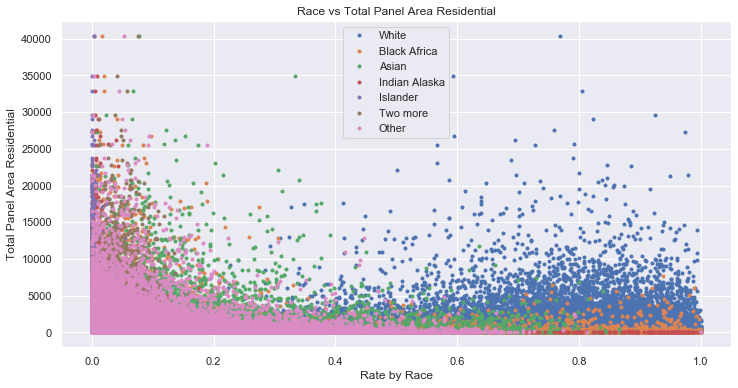

In [90]:
_ = plt.figure(figsize=(12,6))
_ = plt.plot(data['race_white_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['race_black_africa_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['race_asian_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['race_indian_alaska_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['race_islander_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['race_two_more_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['race_other_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.legend(['White','Black Africa','Asian','Indian Alaska','Islander','Two more','Other'])
_ = plt.title('Race vs Total Panel Area Residential')
_ = plt.xlabel('Rate by Race')
_ = plt.ylabel('Total Panel Area Residential')

## f. Occupation (Residential)

In [91]:
occupation_cols = data.columns[data.columns.str.contains('occupation')]
occupation_cols.values

array(['occupation_construction_rate', 'occupation_public_rate',
       'occupation_information_rate', 'occupation_finance_rate',
       'occupation_education_rate', 'occupation_administrative_rate',
       'occupation_manufacturing_rate', 'occupation_wholesale_rate',
       'occupation_retail_rate', 'occupation_transportation_rate',
       'occupation_arts_rate', 'occupation_agriculture_rate'],
      dtype=object)

C:\Users\dmina\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


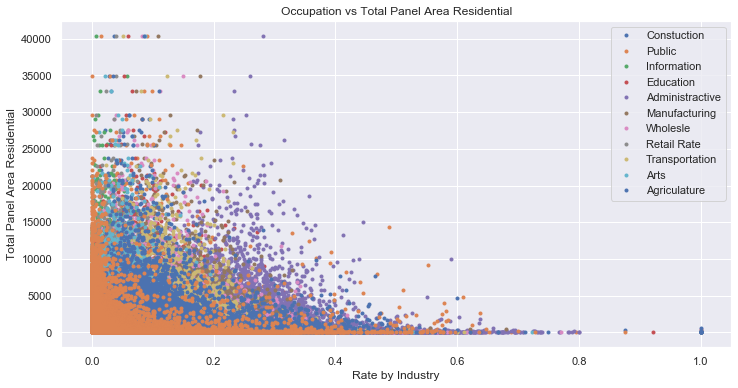

In [92]:
_ = plt.figure(figsize=(12,6))
_ = plt.plot(data['occupation_construction_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['occupation_public_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['occupation_information_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['occupation_finance_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['occupation_education_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['occupation_administrative_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['occupation_manufacturing_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['occupation_wholesale_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['occupation_retail_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['occupation_transportation_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['occupation_arts_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['occupation_agriculture_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.legend(['Constuction','Public','Information','Education','Administractive','Manufacturing','Wholesle',\
                'Retail Rate','Transportation','Arts','Agriculature'])
_ = plt.title('Occupation vs Total Panel Area Residential')
_ = plt.xlabel('Rate by Industry')
_ = plt.ylabel('Total Panel Area Residential')

## g. Transport (Residential)

In [93]:
transport_cols = data.columns[data.columns.str.contains('transport')]
transport_cols.values

array(['electricity_price_transportation',
       'occupation_transportation_rate', 'transportation_home_rate',
       'transportation_car_alone_rate', 'transportation_walk_rate',
       'transportation_carpool_rate', 'transportation_motorcycle_rate',
       'transportation_bicycle_rate', 'transportation_public_rate'],
      dtype=object)

C:\Users\dmina\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


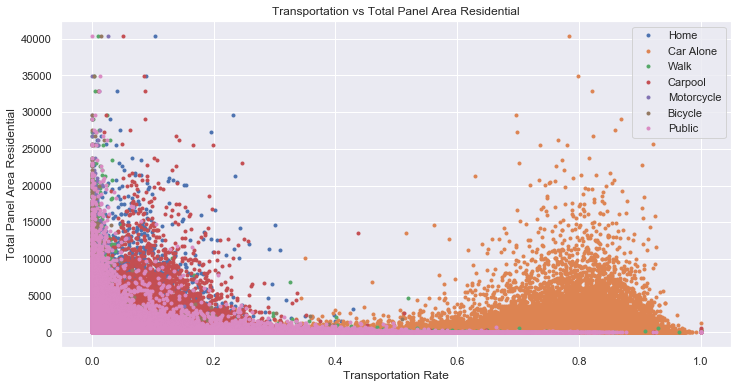

In [94]:
_ = plt.figure(figsize=(12,6))
_ = plt.plot(data['transportation_home_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['transportation_car_alone_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['transportation_walk_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['transportation_carpool_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['transportation_motorcycle_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['transportation_bicycle_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.plot(data['transportation_public_rate'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.legend(['Home','Car Alone','Walk','Carpool','Motorcycle','Bicycle','Public'])
_ = plt.title('Transportation vs Total Panel Area Residential')
_ = plt.xlabel('Transportation Rate')
_ = plt.ylabel('Total Panel Area Residential')

## h. Price (Resiential)

In [95]:
price_cols = data.columns[data.columns.str.contains('price')]
price_cols.values

array(['electricity_price_residential', 'electricity_price_commercial',
       'electricity_price_industrial', 'electricity_price_transportation',
       'electricity_price_overall'], dtype=object)

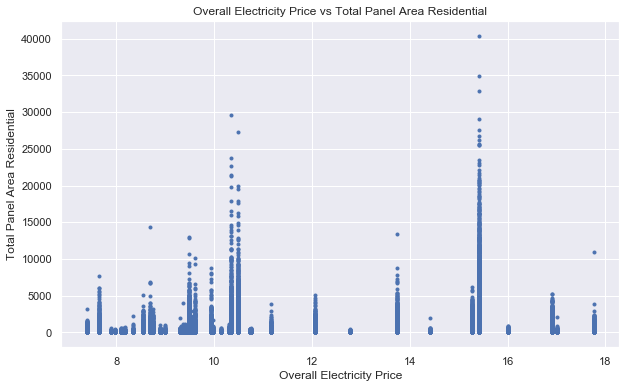

In [96]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(data['electricity_price_overall'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.title('Overall Electricity Price vs Total Panel Area Residential')
_ = plt.xlabel('Overall Electricity Price')
_ = plt.ylabel('Total Panel Area Residential')

## i. Incentives (Residential)

In [97]:
incentitve_cols = data.columns[data.columns.str.contains('incentive')]
incentitve_cols.values

array(['incentive_count_residential', 'incentive_count_nonresidential',
       'incentive_residential_state_level',
       'incentive_nonresidential_state_level'], dtype=object)

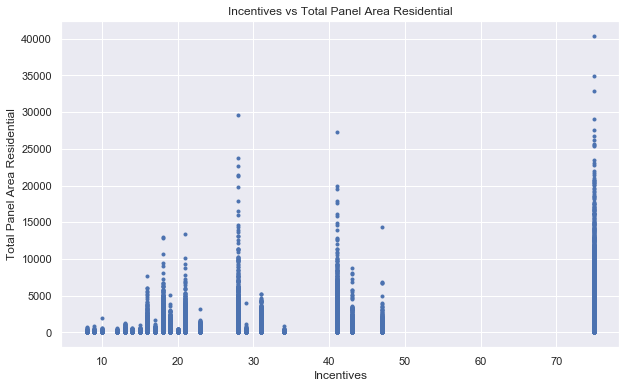

In [98]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(data['incentive_count_residential'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.title('Incentives vs Total Panel Area Residential')
_ = plt.xlabel('Incentives')
_ = plt.ylabel('Total Panel Area Residential')

### Extra: High Price, High Incentive Areas

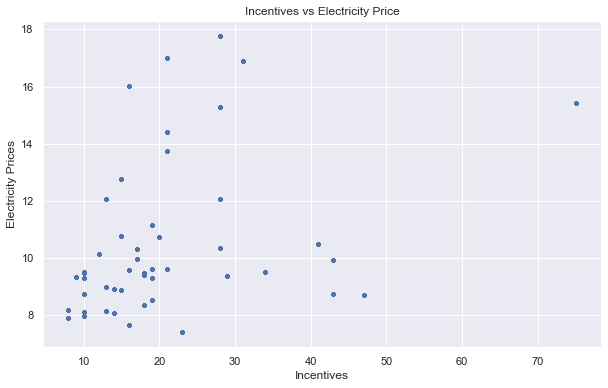

In [99]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(data['incentive_count_residential'], data['electricity_price_overall'], linestyle='None', marker='.')
_ = plt.title('Incentives vs Electricity Price')
_ = plt.xlabel('Incentives')
_ = plt.ylabel('Electricity Prices')

In [100]:
data.sort_values('incentive_count_residential', ascending=False).head()

,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
18188,155.0,121.0,3725.883684,6007000901,108971.688574,Butte County,718,474,32,282,...,85,15,16,21,9,0,38,0,10,14.72
42408,173.0,136.0,6054.383281,6071002018,103346.045694,San Bernardino County,802,1493,68,514,...,85,15,16,21,9,0,38,0,10,14.72
42421,138.0,66.0,9314.115939,6071002036,79390.037387,San Bernardino County,1827,3078,227,1389,...,85,15,16,21,9,0,38,0,10,14.72
42420,125.0,79.0,5820.846452,6071002035,97103.697408,San Bernardino County,1213,1328,126,864,...,85,15,16,21,9,0,38,0,10,14.72
42419,527.0,391.0,19189.253179,6071002034,104732.285774,San Bernardino County,2455,3496,210,1452,...,85,15,16,21,9,0,38,0,10,14.72


## j. Location (Residential)

In [101]:
location_cols = ['lat','lon','elevation','county','state']

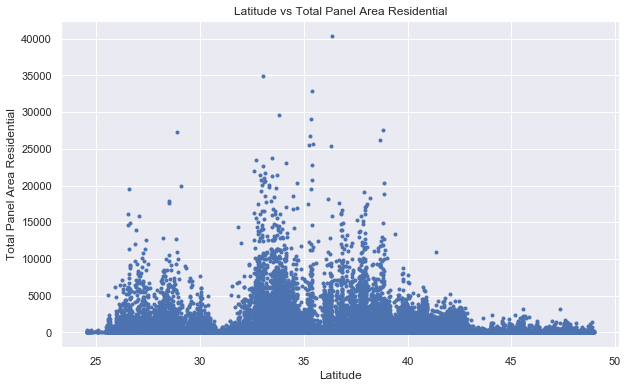

In [102]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(data['lat'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.title('Latitude vs Total Panel Area Residential')
_ = plt.xlabel('Latitude')
_ = plt.ylabel('Total Panel Area Residential')

In [103]:
# Compare Total Panel Area vs Population & Longitude vs Population







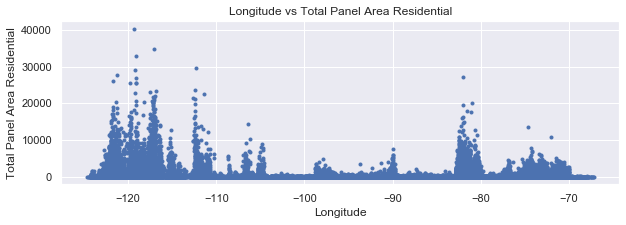

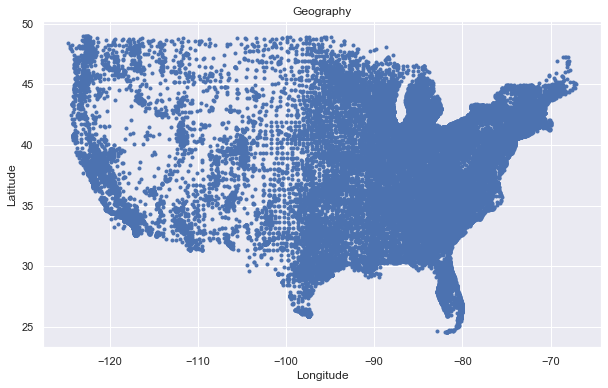

In [104]:
_ = plt.figure(figsize=(10,3))
_ = plt.plot(data['lon'], data['total_panel_area_residential'], linestyle='None', marker='.')
_ = plt.title('Longitude vs Total Panel Area Residential')
_ = plt.xlabel('Longitude')
_ = plt.ylabel('Total Panel Area Residential')

_ = plt.figure(figsize=(10,6))
_ = plt.plot(data['lon'], data['lat'], linestyle='None', marker='.')
_ = plt.title('Geography')
_ = plt.xlabel('Longitude')
_ = plt.ylabel('Latitude')

In [105]:
ID = ['fips','state','county']

solar_related = ['tile_count', 'solar_system_count', 'total_panel_area',\
                 'solar_panel_area_divided_by_area', 'solar_panel_area_per_capita',\
                 'tile_count_residential', 'tile_count_nonresidential',\
                 'solar_system_count_residential', 'solar_system_count_nonresidential',\
                 'total_panel_area_residential', 'total_panel_area_nonresidential',\
                 'number_of_solar_system_per_household']

missing_vals = ['voting_2012_dem_percentage', 'voting_2012_gop_percentage', 'voting_2012_dem_win','electricity_price_transportation']

feature_data = [x for x in data.columns.values if x not in ID + solar_related + missing_vals]

## Residential Solar Predictions

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

target_data = ['total_panel_area_residential']

In [107]:
# Group County Data by Mean
deepsolar_by_county = data.groupby(['state','county']).mean().reset_index()

In [108]:
# Drop
data_cl = deepsolar_by_county[feature_data + target_data].dropna()

# Declare Features and Targets
X = data_cl[feature_data]
y = data_cl[target_data]

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [109]:
# Initiate Model
ln_reg = LinearRegression()

# Fit Model
ln_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
ln_reg.score(X_test, y_test)

0.4286853059134963

In [81]:
# Initiate Model
rf_reg = RandomForestRegressor()

# Fit Model
rf_reg.fit(X_train, y_train)

C:\Users\dmina\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [82]:
rf_reg.score(X_test, y_test)

0.6690373001363852

# 2. Where is next?

## Who Buys Solar? (In the US Market)

<Figure size 576x432 with 0 Axes>

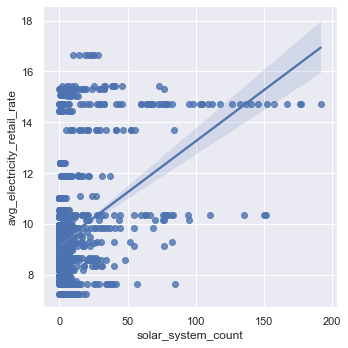

In [83]:
_ = plt.figure(figsize=[8,6])
_ = sns.lmplot(x='solar_system_count', y='avg_electricity_retail_rate', data=deepsolar_by_county)

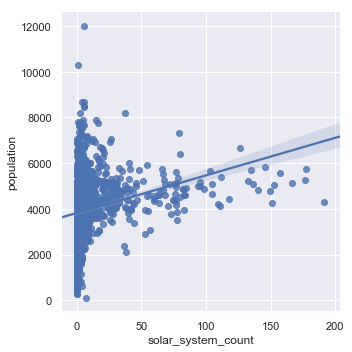

In [11]:
sns.lmplot(x='solar_system_count', y='population', data=deepsolar_by_county)

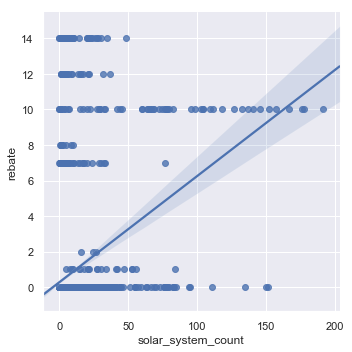

In [12]:
sns.lmplot(x='solar_system_count', y='rebate', data=deepsolar_by_county)

In [ ]:
'''
----------------------
Solar and Weather
----------------------


'''

# Solar and Weather
tmy_solar_meta = pd.read_csv('tmy3-solar/TMY3_StationsMeta.csv')
tmy_solar = pd.read_csv('tmy3-solar/tmy3.csv', low_memory=False)

In [ ]:
tmy_solar_meta.info()

In [20]:
tmy_solar.shape

(8935200, 69)

In [77]:
tmy_solar.head()

,Date (MM/DD/YYYY),Time (HH:MM),ETR (W/m^2),ETRN (W/m^2),GHI (W/m^2),GHI source,GHI uncert (%),DNI (W/m^2),DNI source,DNI uncert (%),...,AOD source,AOD uncert (code),Alb (unitless),Alb source,Alb uncert (code),Lprecip depth (mm),Lprecip quantity (hr),Lprecip source,Lprecip uncert (code),station_number
0,01/01/1998,01:00,0,0,0.0,2,0.0,0.0,2,0.0,...,F,8,0.19,F,8,NaN,NaN,NaN,0,690150
1,01/01/1998,02:00,0,0,0.0,2,0.0,0.0,2,0.0,...,F,8,0.19,F,8,NaN,NaN,NaN,0,690150
2,01/01/1998,03:00,0,0,0.0,2,0.0,0.0,2,0.0,...,F,8,0.19,F,8,NaN,NaN,NaN,0,690150
3,01/01/1998,04:00,0,0,0.0,2,0.0,0.0,2,0.0,...,F,8,0.19,F,8,NaN,NaN,NaN,0,690150
4,01/01/1998,05:00,0,0,0.0,2,0.0,0.0,2,0.0,...,F,8,0.19,F,8,NaN,NaN,NaN,0,690150
